In [1]:
api_key="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"

In [66]:
import tiktoken

code = "def calculate( a, b)"

enc = tiktoken.encoding_for_model("gpt-3.5-turbo")  # cl100k_base
# enc = tiktoken.get_encoding("cl100k_base")
tokens = enc.encode(code)

print(tokens)
# Output: [285, 13913, 1389, 3058, 7, 64, 11, 570, 29, 25, 198, 220, 220, 220, 220, 892, 64, 610, 65]

for token in enc.encode(code):
    print(f"{token:6} → {repr(enc.decode([token]))}")

for line in code.split("\n"):
    line_tokens = enc.encode(line)
    print(f"{len(line_tokens):3} tokens in line: {repr(line)}")

[755, 11294, 7, 264, 11, 293, 8]
   755 → 'def'
 11294 → ' calculate'
     7 → '('
   264 → ' a'
    11 → ','
   293 → ' b'
     8 → ')'
  7 tokens in line: 'def calculate( a, b)'


In [62]:
import requests
import json
import math
url = "https://openrouter.ai/api/v1/chat/completions"
payload = {
    "model": "gpt-3.5-turbo",
    "messages": [{"role": "user", "content": code}],
    "max_tokens": 0,
    "logprobs": True,
    "top_logprobs": 1
}

response = requests.post(
    url,
    headers={
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json"
    },
    json=payload
)
response.raise_for_status()
data = response.json()

a = data["choices"][0]["logprobs"]["content"]
for item in a:
    print(item['token'])
# "def calculate( a, b)"

return
 a
 +
 b


In [54]:
content = data["choices"][0]["logprobs"]["content"]
content


[{'token': ':',
  'bytes': [58],
  'logprob': -3.3880937,
  'top_logprobs': [{'token': '   ',
    'bytes': [32, 32, 32],
    'logprob': -0.98145264}]},
 {'token': ' \n',
  'bytes': [32, 10],
  'logprob': -0.012783682,
  'top_logprobs': [{'token': ' \n',
    'bytes': [32, 10],
    'logprob': -0.012783682}]},
 {'token': '   ',
  'bytes': [32, 32, 32],
  'logprob': -0.06824574,
  'top_logprobs': [{'token': '   ',
    'bytes': [32, 32, 32],
    'logprob': -0.06824574}]},
 {'token': ' sum',
  'bytes': [32, 115, 117, 109],
  'logprob': -0.4544645,
  'top_logprobs': [{'token': ' sum',
    'bytes': [32, 115, 117, 109],
    'logprob': -0.4544645}]},
 {'token': ' =',
  'bytes': [32, 61],
  'logprob': -0.01865343,
  'top_logprobs': [{'token': ' =',
    'bytes': [32, 61],
    'logprob': -0.01865343}]},
 {'token': ' a',
  'bytes': [32, 97],
  'logprob': -6.587483e-05,
  'top_logprobs': [{'token': ' a',
    'bytes': [32, 97],
    'logprob': -6.587483e-05}]},
 {'token': ' +',
  'bytes': [32, 43],
  '

In [10]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import pandas as pd

c:\Users\MSI\MachineLearning\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# Load model
tokenizer = AutoTokenizer.from_pretrained("Salesforce/codegen-350M-mono")
model = AutoModelForCausalLM.from_pretrained("Salesforce/codegen-350M-mono")
model.eval()

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transfor

CodeGenForCausalLM(
  (transformer): CodeGenModel(
    (wte): Embedding(51200, 1024)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-19): 20 x CodeGenBlock(
        (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (attn): CodeGenAttention(
          (attn_dropout): Dropout(p=0.0, inplace=False)
          (resid_dropout): Dropout(p=0.0, inplace=False)
          (qkv_proj): Linear(in_features=1024, out_features=3072, bias=False)
          (out_proj): Linear(in_features=1024, out_features=1024, bias=False)
        )
        (mlp): CodeGenMLP(
          (fc_in): Linear(in_features=1024, out_features=4096, bias=True)
          (fc_out): Linear(in_features=4096, out_features=1024, bias=True)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.0, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1024, out_features=51200, bias=True)
)

In [67]:
import tokenize
import sys
from io import BytesIO

def remove_comments(source_code):
    """
    Removes all comments and docstrings from Python source code.
    Preserves string literals and code logic.
    """
    result = []
    prev_toktype = tokenize.INDENT
    last_lineno = -1
    last_col = 0

    try:
        tokens = tokenize.tokenize(BytesIO(source_code.encode('utf-8')).readline)
    except IndentationError:
        # Fallback: simple line-by-line removal if tokenize fails
        return remove_comments_fallback(source_code)

    for tok in tokens:
        toktype, tokstring, (srow, scol), (erow, ecol), line = tok
        
        # Skip comment tokens
        if toktype == tokenize.COMMENT:
            continue
            
        # Skip entire docstring (triple-quoted strings at module/class/function level)
        if (toktype == tokenize.STRING and 
            tokstring.startswith('"""') or tokstring.startswith("'''")):
            # Only remove if it's a docstring (at indentation level 0 of its block)
            if prev_toktype in (tokenize.INDENT, tokenize.NEWLINE) or prev_toktype == tokenize.INDENT:
                if scol == last_col:  # Same indentation → likely docstring
                    continue

        # Preserve everything else
        if last_lineno != srow:
            # Add newline only if we skipped lines
            if last_lineno != -1:
                result.append('\n')
            last_col = 0
        elif scol > last_col:
            result.append(' ' * (scol - last_col))

        result.append(tokstring)
        last_col = ecol
        last_lineno = erow
        prev_toktype = toktype

    return ''.join(result)


def remove_comments_fallback(source_code):
    """Fallback: remove # comments only (if tokenize fails)"""
    lines = source_code.splitlines()
    cleaned = []
    for line in lines:
        # Remove trailing comments
        if '#' in line:
            line = line.split('#', 1)[0].rstrip()
        cleaned.append(line)
    return '\n'.join(cleaned) + '\n'


# === USAGE EXAMPLE ===
if __name__ == "__main__":
    # Read from file or use sample
    if len(sys.argv) > 1:
        filepath = r"C:\Users\MSI\Downloads\inferencing\code.py"
        with open(filepath, 'r', encoding='utf-8') as f:
            code = f.read()
    else:
        # Sample code with all kinds of comments
        code =  """def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr
"""

    clean_code = remove_comments(code)
    print("=== CLEANED CODE ===\n")
    print(clean_code)

=== CLEANED CODE ===

utf-8
def insertion_sort(arr):

    for i in range(1, len(arr)):

        key = arr[i]

j = i - 1

while j >= 0 and arr[j] > key:

            arr[j + 1] = arr[j]

j -= 1

arr[j + 1] = key

return arr



In [68]:
code = """def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr
"""

In [69]:
# # Your code here
# code = """
# def add_nums(a, b):
#     return a + b
# """

# Tokenize once
tokens = tokenizer(code, return_tensors="pt")
input_ids = tokens.input_ids

In [70]:
a = tokenizer.decode(input_ids[0])
for token_id in input_ids[0]:
    print(token_id.item(), '→', repr(tokenizer.decode([token_id.item()])))

4299 → 'def'
36075 → ' insertion'
62 → '_'
30619 → 'sort'
7 → '('
3258 → 'arr'
2599 → '):'
198 → '\n'
50284 → '    '
1640 → 'for'
1312 → ' i'
287 → ' in'
2837 → ' range'
7 → '('
16 → '1'
11 → ','
18896 → ' len'
7 → '('
3258 → 'arr'
8 → ')'
2599 → '):'
198 → '\n'
50280 → '        '
2539 → 'key'
796 → ' ='
5240 → ' arr'
58 → '['
72 → 'i'
60 → ']'
198 → '\n'
50280 → '        '
73 → 'j'
796 → ' ='
1312 → ' i'
532 → ' -'
352 → ' 1'
198 → '\n'
50280 → '        '
4514 → 'while'
474 → ' j'
18189 → ' >='
657 → ' 0'
290 → ' and'
5240 → ' arr'
58 → '['
73 → 'j'
60 → ']'
1875 → ' >'
1994 → ' key'
25 → ':'
198 → '\n'
50276 → '            '
3258 → 'arr'
58 → '['
73 → 'j'
1343 → ' +'
352 → ' 1'
60 → ']'
796 → ' ='
5240 → ' arr'
58 → '['
73 → 'j'
60 → ']'
198 → '\n'
50276 → '            '
73 → 'j'
48185 → ' -='
352 → ' 1'
198 → '\n'
50280 → '        '
3258 → 'arr'
58 → '['
73 → 'j'
1343 → ' +'
352 → ' 1'
60 → ']'
796 → ' ='
1994 → ' key'
198 → '\n'
50284 → '    '
7783 → 'return'
5240 → ' arr'
198 → '\

In [52]:
def probability_of_token(token_id):
    # Forward pass
    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
        logits = outputs.logits

    # Shift: logits[i] predicts token i+1
    shift_logits = logits[..., :-1, :].contiguous()
    shift_labels = input_ids[..., 1:].contiguous()

    # Prob of the actual next token
    probs = torch.softmax(shift_logits, dim=-1)
    actual_probs = torch.gather(probs, 2, shift_labels.unsqueeze(-1)).squeeze(-1)
    return actual_probs

In [71]:
def token_probs_long(code, stride=512, max_len=2048):
    tokens = tokenizer(code, return_tensors="pt").input_ids[0]
    results = []
    
    for i in range(0, len(tokens), stride):
        window = tokens[i:i+max_len]
        if len(window) < 2: break
            
        with torch.no_grad():
            out = model(window.unsqueeze(0), labels=window.unsqueeze(0))
            probs = torch.softmax(out.logits[0, :-1], dim=-1)
            actual = window[1:]
            prob = torch.gather(probs, 1, actual.unsqueeze(1)).squeeze(1)
        
        start = max(i, 0)
        for j, (tok_id, p) in enumerate(zip(actual, prob)):
            token = tokenizer.decode(tok_id)
            results.append({
                "pos": start + j + 1,
                "token": token.strip(),
                "prob": f"{p.item()}%"
            })
    
    return pd.DataFrame(results)

data_frame = token_probs_long(code)
data_frame

,pos,token,prob
0,1,insertion,2.5789729988900945e-05%
1,2,_,0.5008121132850647%
2,3,sort,0.9590533971786499%
3,4,(,0.9497361183166504%
4,5,arr,0.1397678256034851%
...,...,...,...
77,78,,0.801405131816864%
78,79,,0.25840744376182556%
79,80,return,0.9198158383369446%
80,81,arr,0.9973148703575134%


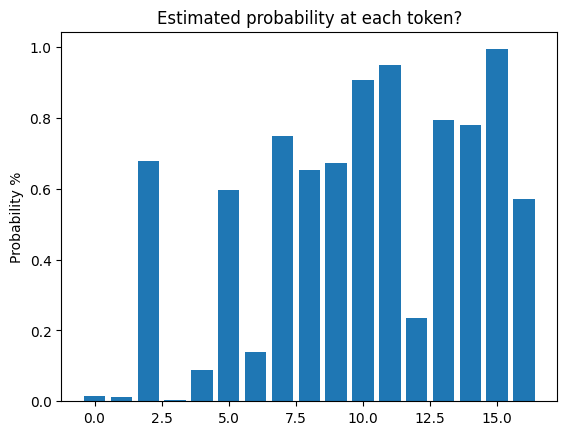

17
  0 tokens in line: 
 10 tokens in line: def add_nums(a, b):
  5 tokens in line:     return a + b
  0 tokens in line: 


In [59]:
import matplotlib.pyplot as plt
plt.bar(range(len(data_frame)), [float(p[:-1]) for p in data_frame['prob']])
plt.title("Estimated probability at each token?")
plt.ylabel("Probability %")
plt.show()
data_frame

print(len(data_frame))
for line in code.split("\n"):
    line_tokens = tokenizer.encode(line)
    print(f"{len(line_tokens):3} tokens in line: {tokenizer.decode(line_tokens)}")

